<a href="https://colab.research.google.com/github/LucasPequenoSterzeck/Machine_Learning_LPS/blob/main/LinearRegressor%26SGDR_Regressor_EURUSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizano o SGDR Regressor

Variante dos metodos de regressão.

<img src='https://programming-review.com/wp-content/uploads/2020/04/scikit-learn.jpg' width='900'>

NOTA: Regressão SGD localizada no quadrante superior da direita.

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Loading data_set


df = pd.read_excel(r'/content/polish_EURUSD.xlsx')

df_bg = df

df

,Ativo,abertura,fechamento,maximo,minimo,momento_ref
0,EUR/USD,1.0702,1.0699,1.0702,1.0697,2023-01-01 19:01:47
1,EUR/USD,1.0699,1.0699,1.0699,1.0698,2023-01-01 19:06:51
2,EUR/USD,1.0699,1.0699,1.0699,1.0699,2023-01-01 19:11:56
3,EUR/USD,1.0699,1.0692,1.0701,1.0692,2023-01-01 19:17:01
4,EUR/USD,1.0692,1.0693,1.0693,1.0692,2023-01-01 19:22:05
...,...,...,...,...,...,...
754,EUR/USD,1.0603,1.0603,1.0603,1.0600,2023-01-04 17:50:55
755,EUR/USD,1.0602,1.0605,1.0607,1.0602,2023-01-04 17:56:01
756,EUR/USD,1.0605,1.0600,1.0607,1.0600,2023-01-04 18:01:07
757,EUR/USD,1.0600,1.0602,1.0604,1.0599,2023-01-04 18:06:13


In [ ]:
import numpy as np

i = 0
for d in df.iterrows():
  i += 1
  if i > 1: df.loc[d[0], 'dif_fechamento'] = (d[1].fechamento - d_past[1].fechamento) *10000
  d_past = d

df.loc[d[0], 'dif_fechamento'] = np.nan

df

,Ativo,abertura,fechamento,maximo,minimo,momento_ref,dif_fechamento
0,EUR/USD,1.0702,1.0699,1.0702,1.0697,2023-01-01 19:01:47,NaN
1,EUR/USD,1.0699,1.0699,1.0699,1.0698,2023-01-01 19:06:51,0.0
2,EUR/USD,1.0699,1.0699,1.0699,1.0699,2023-01-01 19:11:56,0.0
3,EUR/USD,1.0699,1.0692,1.0701,1.0692,2023-01-01 19:17:01,-7.0
4,EUR/USD,1.0692,1.0693,1.0693,1.0692,2023-01-01 19:22:05,1.0
...,...,...,...,...,...,...,...
754,EUR/USD,1.0603,1.0603,1.0603,1.0600,2023-01-04 17:50:55,2.0
755,EUR/USD,1.0602,1.0605,1.0607,1.0602,2023-01-04 17:56:01,2.0
756,EUR/USD,1.0605,1.0600,1.0607,1.0600,2023-01-04 18:01:07,-5.0
757,EUR/USD,1.0600,1.0602,1.0604,1.0599,2023-01-04 18:06:13,2.0


In [ ]:
import numpy as np
# Criando colunas para aumentar os indicadores

# Média periodo 5
df['med_5'] = df.fechamento.rolling(5).mean()

# Média periodo 21
df['med_21'] = df.fechamento.rolling(21).mean()

# Tendência Alta
ct = 0
for r in df.iterrows():
  ct += 1

  if ct > 1:
    if r[1].fechamento > past_r[1].fechamento: df.loc[r[0], 'CIMA'] = 1
    else: df.loc[r[0], 'CIMA'] = 0
    if r[1].fechamento < past_r[1].fechamento: df.loc[r[0], 'BAIXO'] = 1
    else: df.loc[r[0], 'BAIXO'] = 0
    if r[1].fechamento == past_r[1].fechamento: df.loc[r[0], 'DOJO'] = 1
    else: df.loc[r[0], 'DOJO'] = 0
    if r[1].med_5 > past_r[1].med_21: df.loc[r[0], '5A'] = 1
    else: df.loc[r[0], '5A'] = 0
    if r[1].med_5 < past_r[1].med_21: df.loc[r[0], '5B'] = 1
    else: df.loc[r[0], '5B'] = 0
    if r[1].momento_ref.minute in [0,1,2,3,4,5,6,7,8,9,50,51,52,53,54,55,56,57,58,59]: df.loc[r[0], 'Meio_Minuto'] = 0
    else: df.loc[r[0], 'Meio_Minuto'] = 1
  past_r = r
  
df['med_DIF'] = df.med_5 - df.med_21 * 10


# Tendencia Baixa
display(df)


,Ativo,abertura,fechamento,maximo,minimo,momento_ref,dif_fechamento,med_5,med_21,CIMA,BAIXO,DOJO,5A,5B,Meio_Minuto,med_DIF
0,EUR/USD,1.0702,1.0699,1.0702,1.0697,2023-01-01 19:01:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EUR/USD,1.0699,1.0699,1.0699,1.0698,2023-01-01 19:06:51,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2,EUR/USD,1.0699,1.0699,1.0699,1.0699,2023-01-01 19:11:56,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,NaN
3,EUR/USD,1.0699,1.0692,1.0701,1.0692,2023-01-01 19:17:01,-7.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,NaN
4,EUR/USD,1.0692,1.0693,1.0693,1.0692,2023-01-01 19:22:05,1.0,1.06964,NaN,1.0,0.0,0.0,0.0,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,EUR/USD,1.0603,1.0603,1.0603,1.0600,2023-01-04 17:50:55,2.0,1.06030,1.060090,1.0,0.0,0.0,1.0,0.0,0.0,-9.540605
755,EUR/USD,1.0602,1.0605,1.0607,1.0602,2023-01-04 17:56:01,2.0,1.06032,1.060138,1.0,0.0,0.0,1.0,0.0,0.0,-9.541061
756,EUR/USD,1.0605,1.0600,1.0607,1.0600,2023-01-04 18:01:07,-5.0,1.06024,1.060162,0.0,1.0,0.0,1.0,0.0,0.0,-9.541379
757,EUR/USD,1.0600,1.0602,1.0604,1.0599,2023-01-04 18:06:13,2.0,1.06022,1.060157,1.0,0.0,0.0,1.0,0.0,0.0,-9.541351


In [ ]:

df.dif_fechamento = df.dif_fechamento.shift(-1)
df.dropna(inplace=True)
print(f'Linhas total: {df.shape[0]}')
df_v = df[-80:]
df = df[:-80]
print(f'Linhas Modelo: {df.shape[0]} x Linhas validação: {df_v.shape[0]}')
display(df.head())


df.dtypes

Linhas total: 737
Linhas Modelo: 657 x Linhas validação: 80


,Ativo,abertura,fechamento,maximo,minimo,momento_ref,dif_fechamento,med_5,med_21,CIMA,BAIXO,DOJO,5A,5B,Meio_Minuto,med_DIF
20,EUR/USD,1.0691,1.0694,1.0694,1.0691,2023-01-01 20:43:35,-2.0,1.06926,1.069224,1.0,0.0,0.0,0.0,0.0,1.0,-9.622978
21,EUR/USD,1.0694,1.0692,1.0695,1.0689,2023-01-01 20:48:40,3.0,1.06920,1.069190,0.0,1.0,0.0,0.0,1.0,1.0,-9.622705
22,EUR/USD,1.0692,1.0695,1.0696,1.0692,2023-01-01 20:53:46,-1.0,1.06928,1.069171,1.0,0.0,0.0,1.0,0.0,0.0,-9.622434
23,EUR/USD,1.0694,1.0694,1.0696,1.0692,2023-01-01 20:58:53,0.0,1.06932,1.069148,0.0,1.0,0.0,1.0,0.0,0.0,-9.622156
24,EUR/USD,1.0694,1.0694,1.0694,1.0694,2023-01-01 21:03:57,9.0,1.06938,1.069157,0.0,0.0,1.0,1.0,0.0,0.0,-9.622191


Ativo                     object
abertura                 float64
fechamento               float64
maximo                   float64
minimo                   float64
momento_ref       datetime64[ns]
dif_fechamento           float64
med_5                    float64
med_21                   float64
CIMA                     float64
BAIXO                    float64
DOJO                     float64
5A                       float64
5B                       float64
Meio_Minuto              float64
med_DIF                  float64
dtype: object

In [ ]:
X = df.drop(df[['momento_ref','fechamento', 'Ativo', 'dif_fechamento']], axis=1)
y = df.dif_fechamento.values

scaler = MinMaxScaler().fit(X)
features_scale = scaler.transform(X)

xtrain, xtest, ytrain, ytest=train_test_split(features_scale, y, test_size=0.15)

## Testes

LinearRegression()
SGDRegressor(eta0=0.09, learning_rate='adaptive')
R-squared: -2.272264767023068e+18 /// 2ª opção: 0.0015859132979303414
Acurácia da regressão SGDR: 11.23 /// 2ª opção: 2.85


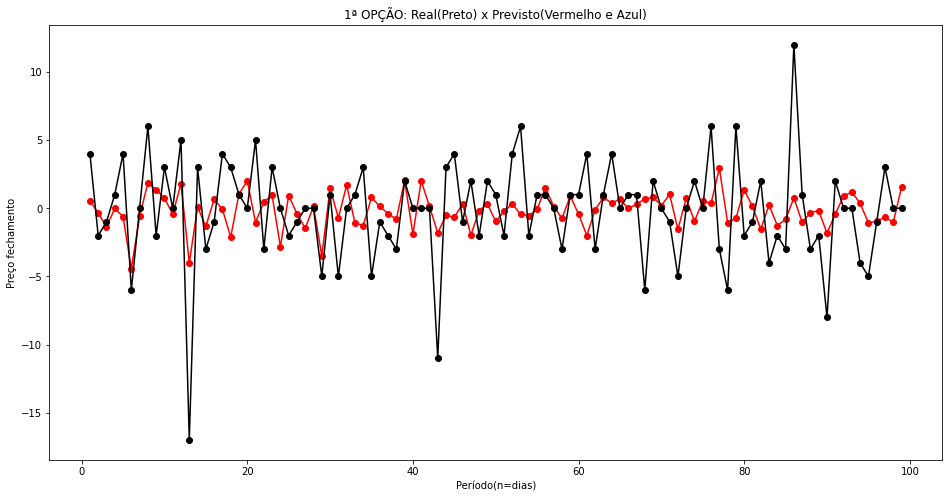

In [ ]:
from sklearn.linear_model import LinearRegression
sgdr = LinearRegression()
sgdr2 = SGDRegressor(loss='squared_error', learning_rate='adaptive', eta0=0.09)
print(sgdr)
print(sgdr2)

##################

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

sgdr.fit(xtest, ytest)
pred = sgdr.predict(xtest)
score = sgdr.score(xtrain, ytrain)

sgdr2.fit(xtest, ytest)
pred2 = sgdr2.predict(xtest)
score2 = sgdr2.score(xtrain, ytrain)

print(f"R-squared: {score} /// 2ª opção: {score2}")
cd = r2_score(ytest, pred)
cd2 = r2_score(ytest, pred2)
print(f'Acurácia da regressão SGDR: {cd * 100:.2f} /// 2ª opção: {cd2 * 100:.2f}')

###################

plt.figure(figsize=(16,8))
plt.title('1ª OPÇÃO: Real(Preto) x Previsto(Vermelho e Azul)')
plt.plot([i for i in range(1,len(ytest)+1)], pred,  c='red', marker='o')
#plt.plot([i for i in range(1,len(ytest)+1)], pred2,  c='blue', marker='o')
plt.plot([i for i in range(1,len(ytest)+1)], ytest,c='black', marker='o')
plt.xlabel('Período(n=dias)')
plt.ylabel('Preço fechamento')
plt.show()


In [ ]:
sgdr.rank_

10

In [ ]:
X_v = df_v.drop(df_v[['momento_ref','fechamento', 'Ativo', 'dif_fechamento']], axis=1)
y_v = df_v.dif_fechamento.values

features_scale_v = scaler.transform(X_v)

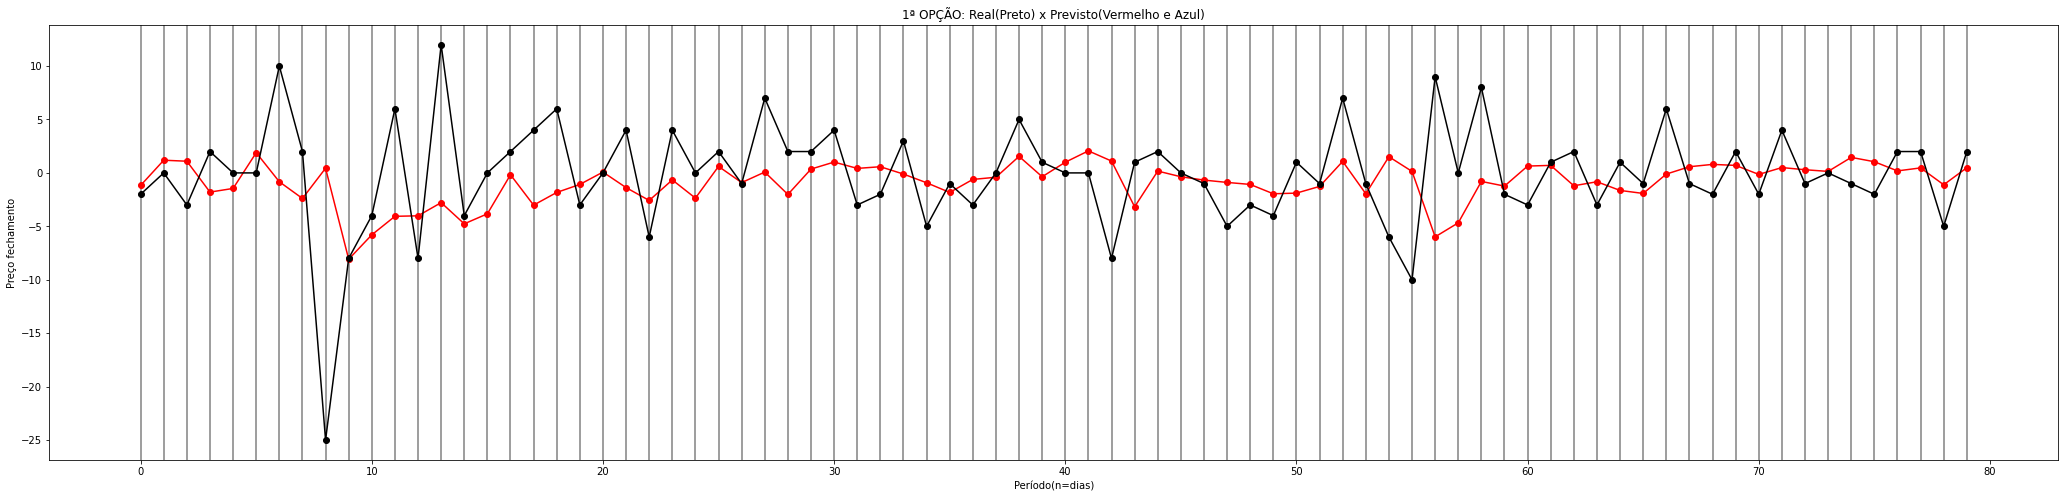

In [ ]:
pred = sgdr.predict(features_scale_v)

pred2 = sgdr2.predict(features_scale_v)



###################

plt.figure(figsize=(36,8))
plt.title('1ª OPÇÃO: Real(Preto) x Previsto(Vermelho e Azul)')
for x_l in range(0,len(y_v)):
  plt.axvline(x=x_l, color='gray', linestyle='-')
plt.plot([i for i in range(0,len(y_v))], pred,  c='red', marker='o')
#plt.plot([i for i in range(0,len(y_v))], pred2,  c='blue', marker='o')
plt.plot([i for i in range(0,len(df_v.dif_fechamento.values))], df_v.dif_fechamento.values,c='black', marker='o')
plt.xlabel('Período(n=dias)')
plt.ylabel('Preço fechamento')
plt.show()

In [ ]:

df_va = pd.DataFrame(zip(df_v.momento_ref.values,df_v.dif_fechamento.values,pred,pred2,df_v.abertura.values), columns=['Data','dif_fechamento','Previ01','Previ02','Open'])

df_va['Pv01_Real'] = df_va.eval('((Previ01 - dif_fechamento)-1)*100')
df_va['Pv02_Real'] = df_va.eval('((Previ02 - dif_fechamento)-1)*100')

#display(df_va)



display(df_va.head(8))

co = 0
list_win = []
list_loss = []
for r in df_va.iterrows():
  co += 1
  if co > 1:
    if r[1].dif_fechamento > ant_r[1].dif_fechamento and r[1][2] > ant_r[1].dif_fechamento: list_win.append(1), print('WIN')
    elif r[1].dif_fechamento < ant_r[1].dif_fechamento and r[1][2] < ant_r[1].dif_fechamento: list_win.append(1), print('WIN') #, f'Comparação fechamento {r[1].Fechamento} é menor que anterior {ant_r[1].Fechamento} // e previsão agora {r[1][3]} é menor que fechamento ant {ant_r[1].Fechamento}')
    else: list_loss.append(1), print('LOSS')
  ant_r = r

print(f'''\n\nMÉTODO SOMENTE MOVIMENTO POR ULTIMO FECHAMENTO E MOVIMENTO PREVISÃO
      Fora analisados {len(list_win)+len(list_loss)} entradas
      Vitórias = {len(list_win)} - {round(len(list_win)/(len(list_win)+len(list_loss))*100)}%
      Derrotas = {len(list_loss)} - {round(len(list_loss)/(len(list_win)+len(list_loss))*100)}%
      ''')

,Data,dif_fechamento,Previ01,Previ02,Open,Pv01_Real,Pv02_Real
0,2023-01-04 11:19:00,-2.0,-1.171875,0.236933,1.0612,-17.1875,123.693331
1,2023-01-04 11:24:07,0.0,1.187500,-0.045573,1.0614,18.7500,-104.557335
2,2023-01-04 11:29:14,-3.0,1.093750,1.414158,1.0614,309.3750,341.415784
3,2023-01-04 11:34:19,2.0,-1.796875,-0.064414,1.0612,-479.6875,-306.441399
4,2023-01-04 11:39:24,0.0,-1.453125,0.214814,1.0609,-245.3125,-78.518627
5,2023-01-04 11:44:28,0.0,1.890625,1.410116,1.0611,89.0625,41.011576
6,2023-01-04 11:49:35,10.0,-0.828125,1.392699,1.0611,-1182.8125,-960.730141
7,2023-01-04 11:54:40,2.0,-2.390625,0.014132,1.0609,-539.0625,-298.586810


WIN
LOSS
WIN
WIN
LOSS
LOSS
WIN
WIN
WIN
WIN
LOSS
WIN
WIN
WIN
WIN
LOSS
LOSS
LOSS
WIN
WIN
LOSS
WIN
WIN
WIN
WIN
WIN
WIN
WIN
LOSS
LOSS
WIN
WIN
WIN
WIN
WIN
LOSS
WIN
WIN
WIN
LOSS
LOSS
LOSS
WIN
LOSS
WIN
WIN
LOSS
WIN
LOSS
WIN
WIN
WIN
WIN
LOSS
LOSS
WIN
WIN
LOSS
WIN
LOSS
WIN
LOSS
WIN
WIN
WIN
WIN
WIN
LOSS
WIN
WIN
WIN
WIN
WIN
LOSS
LOSS
WIN
LOSS
WIN
WIN


MÉTODO SOMENTE MOVIMENTO POR ULTIMO FECHAMENTO E MOVIMENTO PREVISÃO
      Fora analisados 79 entradas
      Vitórias = 53 - 67%
      Derrotas = 26 - 33%
      


In [ ]:
#OLD
co = 0
list_win = []
list_loss = []
for r in df_va.iterrows():
  co += 1
  if co > 1:
    if r[1].Fechamento > ant_r[1].Fechamento and r[1][2] > ant_r[1][2]: list_win.append(1)#, print('WIN')
    elif r[1].Fechamento < ant_r[1].Fechamento and r[1][2] < ant_r[1][2]: list_win.append(1)#, print('WIN')
    else: list_loss.append(1)#, print('LOSS')


  ant_r = r

print(f'''MÉTODO SOMENTE MOVIMENTO POR PREVISÃO X FECHAMENTO
      Fora analisados {len(list_win)+len(list_loss)} entradas
      Vitórias = {len(list_win)} - {round(len(list_win)/(len(list_win)+len(list_loss))*100)}%
      Derrotas = {len(list_loss)} - {round(len(list_loss)/(len(list_win)+len(list_loss))*100)}%
      \n''')

In [ ]:
len(list_win)+len(list_loss)

41